In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data Exploration

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

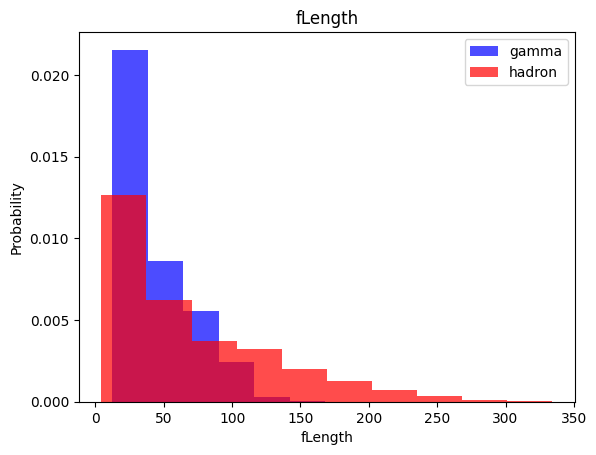

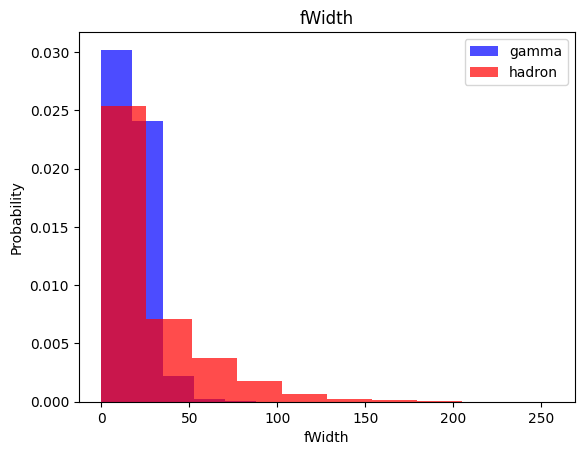

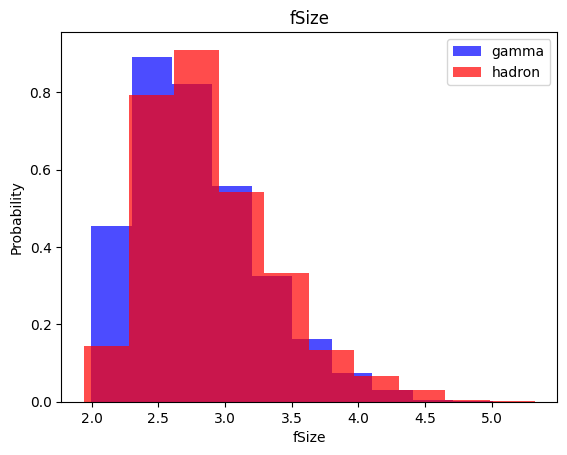

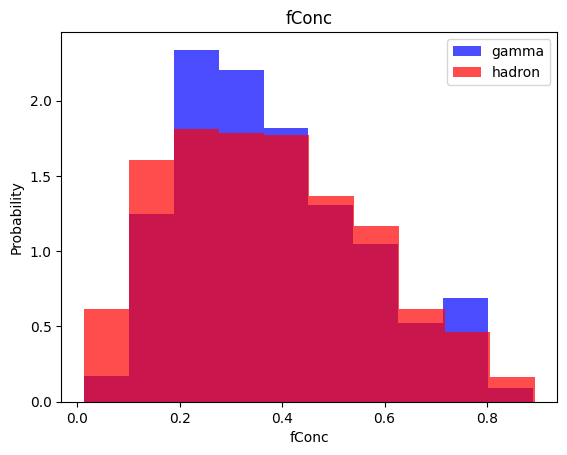

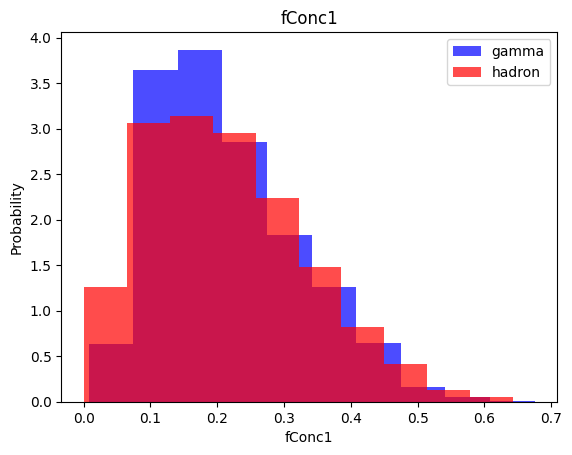

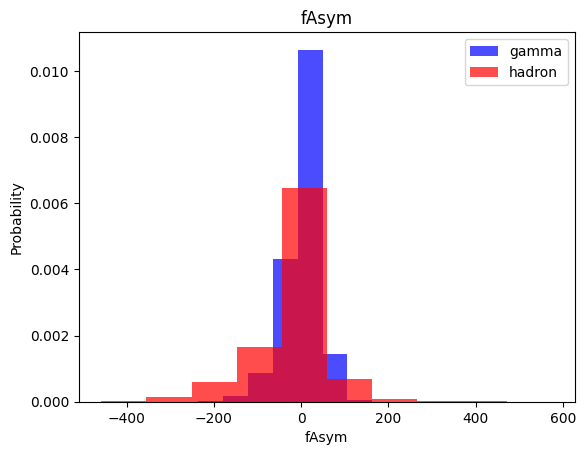

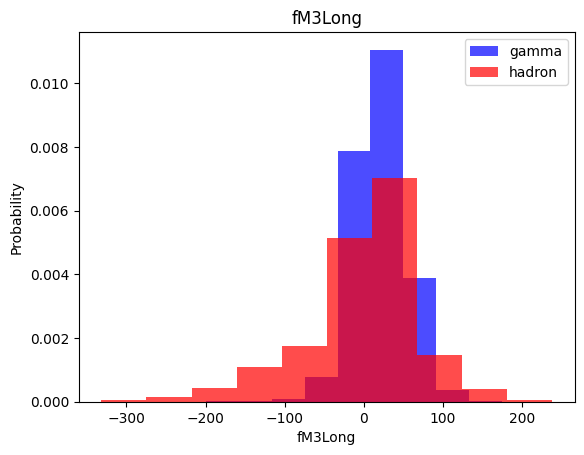

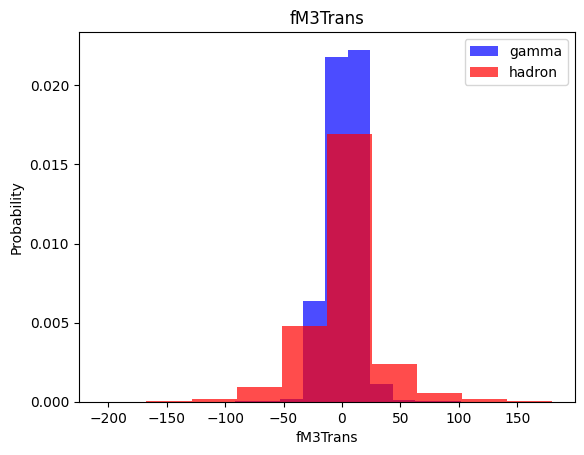

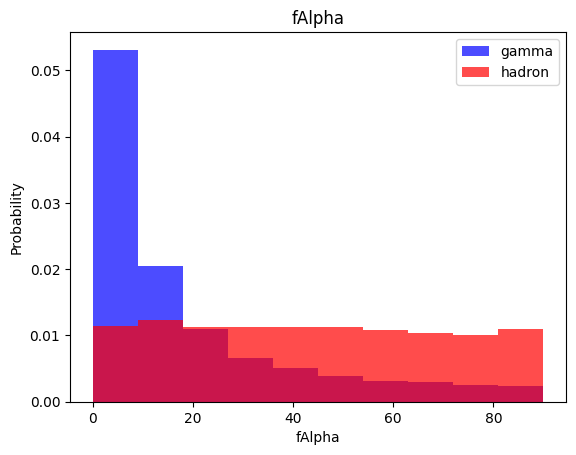

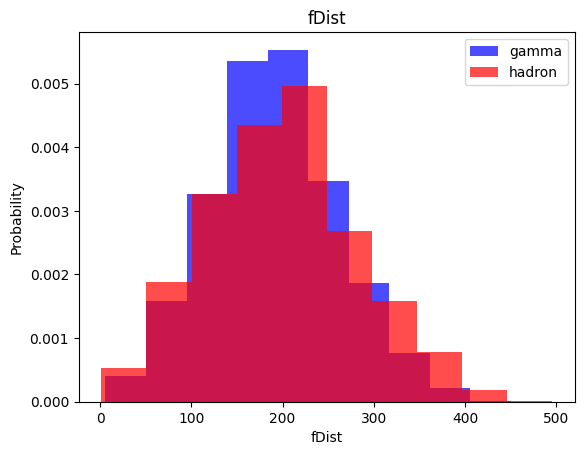

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, and test data

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.9*len(df))])

/home/bagus/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scaler_data(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    standardizer = StandardScaler()
    x = standardizer.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    #Suggestion: shouldn't the oversampling done after the concatenation?
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y

In [8]:
scaled_train, scaled_train_x, scaled_train_y = scaler_data(train, oversample=True)
scaled_valid, scaled_valid_x, scaled_valid_y = scaler_data(valid, oversample=False)
scaled_test, scaled_test_x, scaled_test_y = scaler_data(test, oversample=False)

KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(scaled_train_x, scaled_train_y)

KNeighborsClassifier(n_neighbors=10)

In [11]:
y_pred = knn_model.predict(scaled_test_x)

In [12]:
print(classification_report(scaled_test_y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       677
           1       0.87      0.87      0.87      1225

    accuracy                           0.83      1902
   macro avg       0.82      0.82      0.82      1902
weighted avg       0.83      0.83      0.83      1902



Naive Bayes Model

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model.fit(scaled_train_x, scaled_train_y)

GaussianNB()

In [15]:
y_pred = nb_model.predict(scaled_test_x)
print(classification_report(scaled_test_y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.40      0.53       677
           1       0.74      0.93      0.82      1225

    accuracy                           0.74      1902
   macro avg       0.75      0.67      0.67      1902
weighted avg       0.74      0.74      0.72      1902



Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression(penalty='l2')
lg_model.fit(scaled_train_x, scaled_train_y)

LogisticRegression()

In [18]:
y_pred = lg_model.predict(scaled_test_x)
print(classification_report(scaled_test_y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       677
           1       0.85      0.81      0.83      1225

    accuracy                           0.78      1902
   macro avg       0.76      0.77      0.77      1902
weighted avg       0.79      0.78      0.78      1902



Support Vector Machine

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model.fit(scaled_train_x, scaled_train_y)

SVC()

In [21]:
y_pred = svm_model.predict(scaled_test_x)
print(classification_report(scaled_test_y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       677
           1       0.89      0.89      0.89      1225

    accuracy                           0.86      1902
   macro avg       0.85      0.84      0.84      1902
weighted avg       0.86      0.86      0.86      1902



NN Model

In [22]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)
print("Keras version: ", tf.keras.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("GPUS avaliable: ", gpus)

2024-07-10 21:37:16.839937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 21:37:16.854379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 21:37:16.854421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 21:37:16.864431: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 21:37:18.001174: W tensorflow/compiler/tf

Tensorflow version:  2.16.2
Keras version:  3.4.1
GPUS avaliable:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-07-10 21:37:19.384560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 21:37:19.420594: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 21:37:19.420680: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [28]:
def plot_result(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()


In [24]:
def train_model(X_train, y_train, num_nodes, drop_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(drop_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(drop_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(drop_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size = batch_size, validation_data=(scaled_valid_x, scaled_valid_y), verbose=0
    )

    return nn_model, history

16 nodes, drop 0, lr 0.01, batch size 32


/home/bagus/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


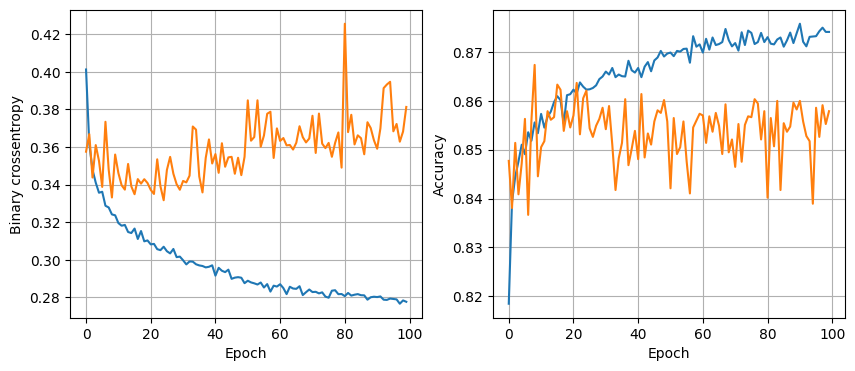

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3677
16 nodes, drop 0, lr 0.01, batch size 64


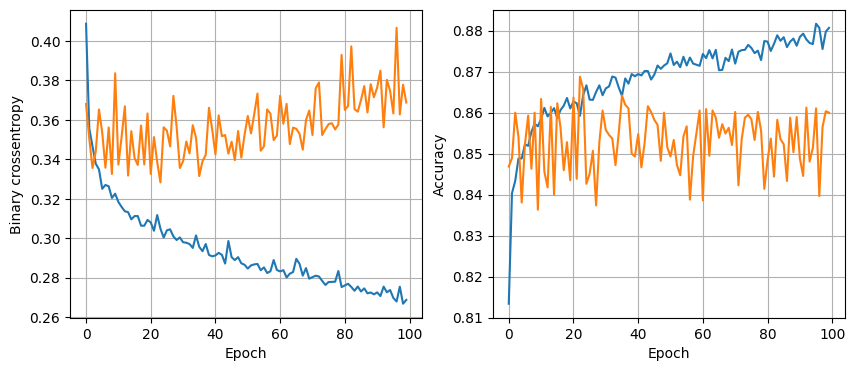

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3562
16 nodes, drop 0, lr 0.01, batch size 128


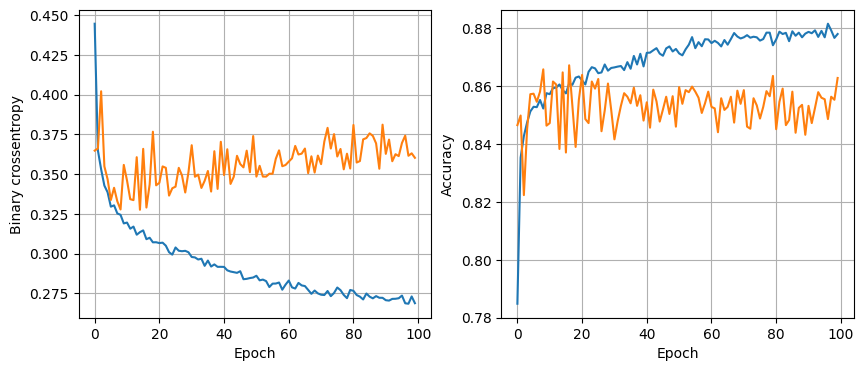

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3553
16 nodes, drop 0, lr 0.003, batch size 32


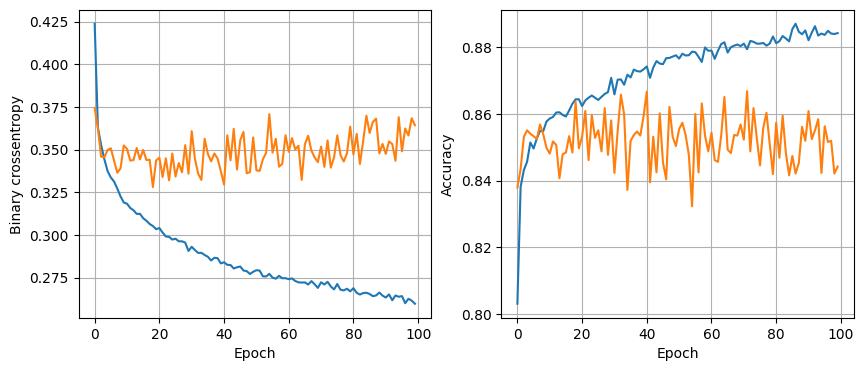

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8526 - loss: 0.3563
16 nodes, drop 0, lr 0.003, batch size 64


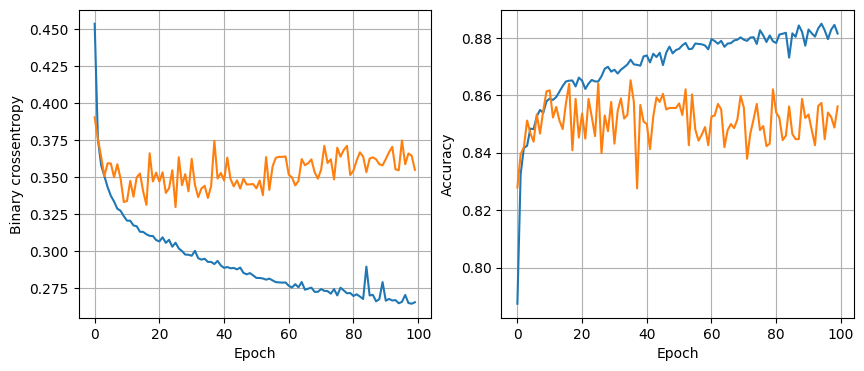

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3490
16 nodes, drop 0, lr 0.003, batch size 128


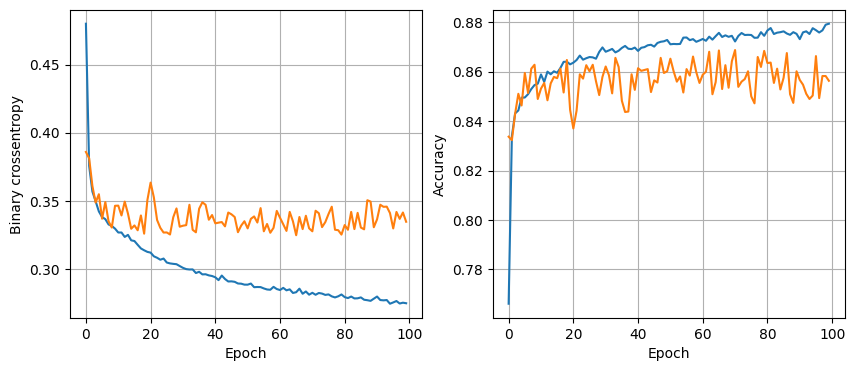

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8574 - loss: 0.3294
16 nodes, drop 0, lr 0.001, batch size 32


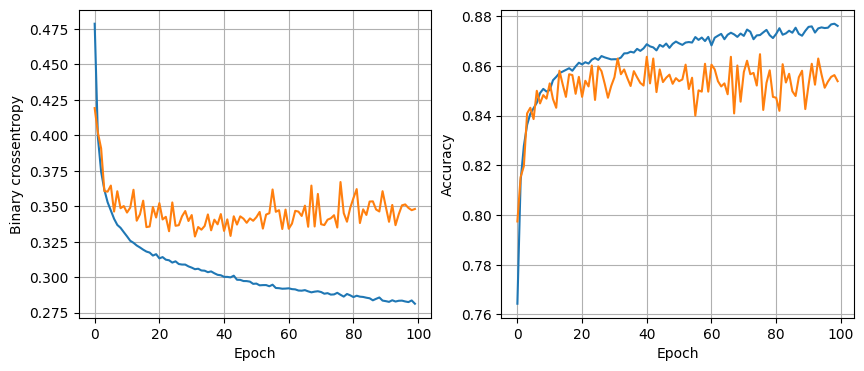

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8546 - loss: 0.3481
16 nodes, drop 0, lr 0.001, batch size 64


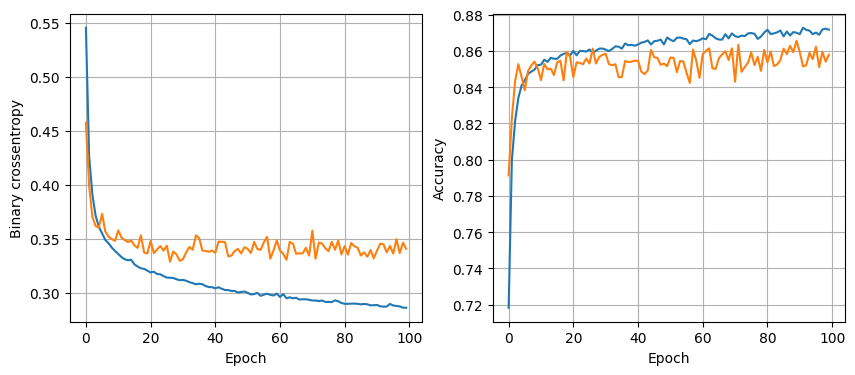

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8663 - loss: 0.3286
16 nodes, drop 0, lr 0.001, batch size 128


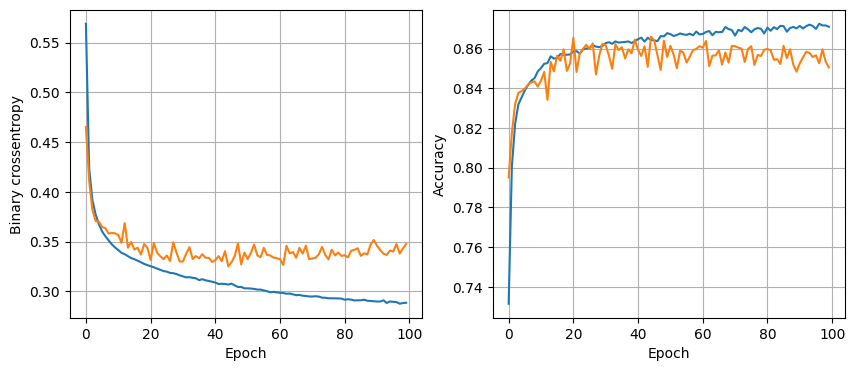

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3421
16 nodes, drop 0.2, lr 0.01, batch size 32


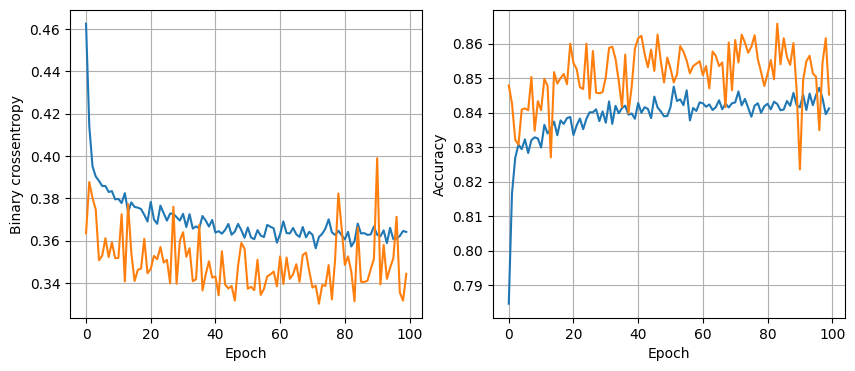

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.3362
16 nodes, drop 0.2, lr 0.01, batch size 64


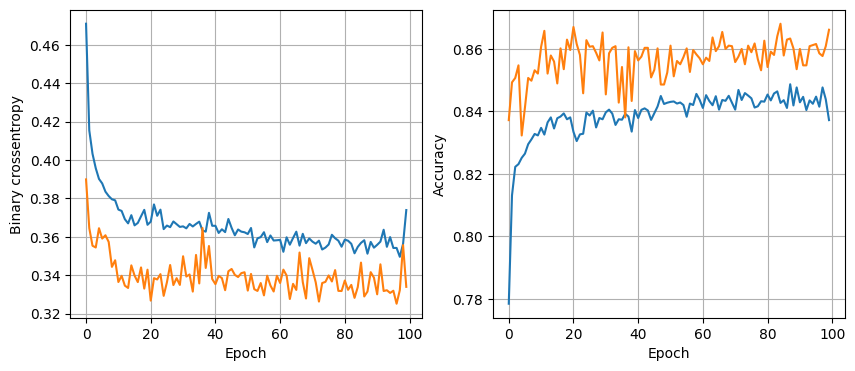

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3265
16 nodes, drop 0.2, lr 0.01, batch size 128


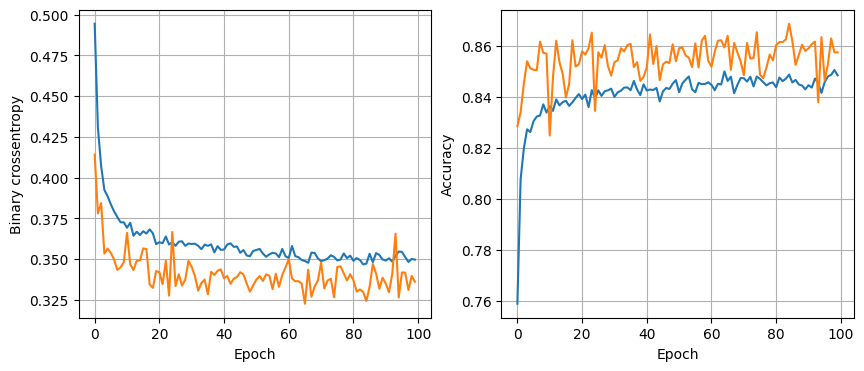

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3288
16 nodes, drop 0.2, lr 0.003, batch size 32


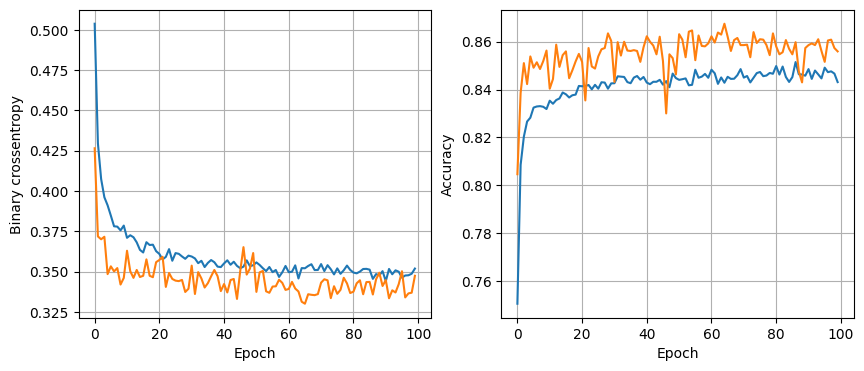

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3404
16 nodes, drop 0.2, lr 0.003, batch size 64


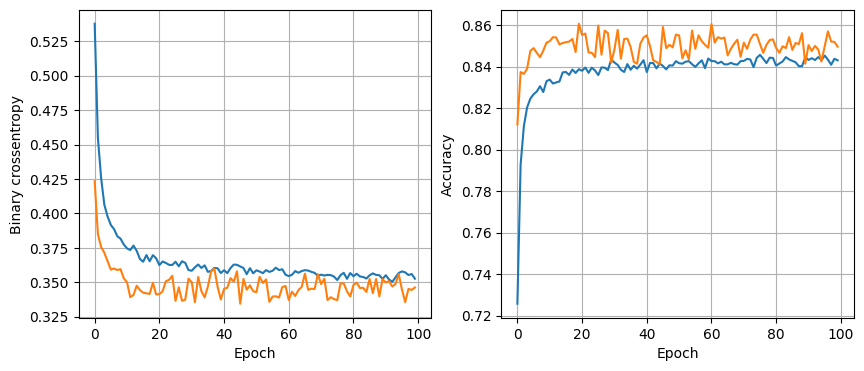

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3387
16 nodes, drop 0.2, lr 0.003, batch size 128


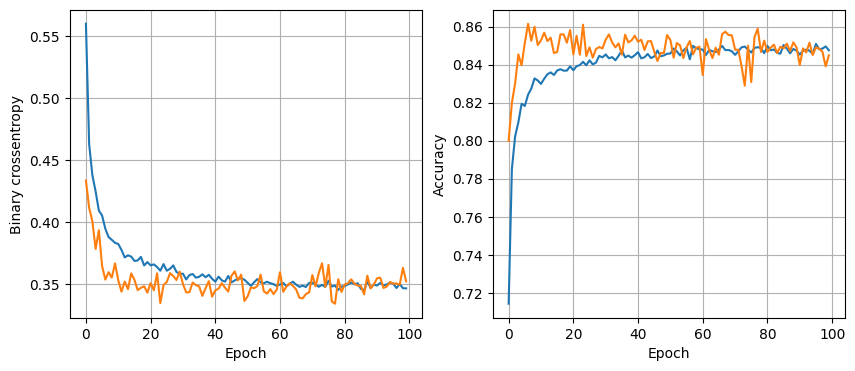

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3491
16 nodes, drop 0.2, lr 0.001, batch size 32


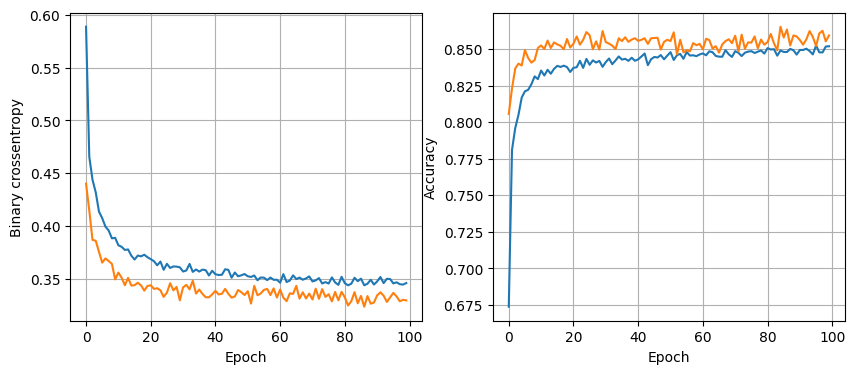

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3222
16 nodes, drop 0.2, lr 0.001, batch size 64


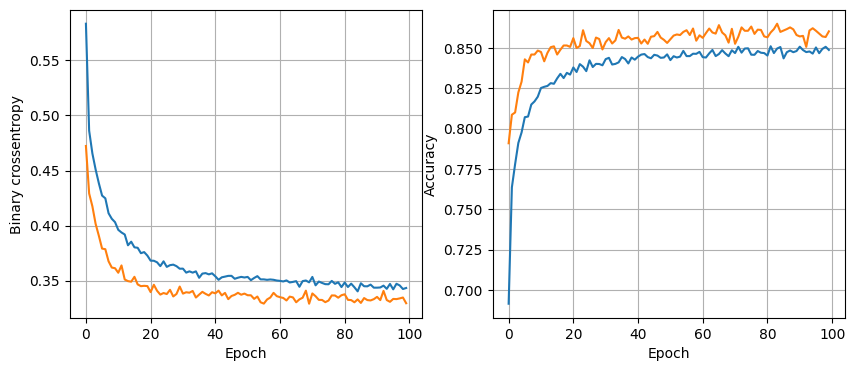

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.3242
16 nodes, drop 0.2, lr 0.001, batch size 128


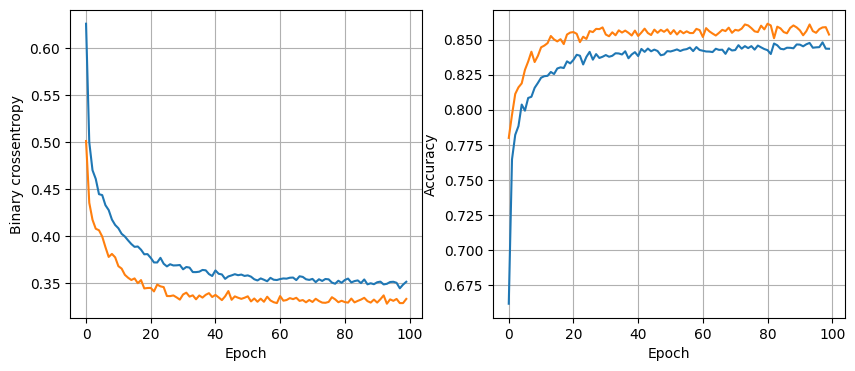

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.3281
32 nodes, drop 0, lr 0.01, batch size 32


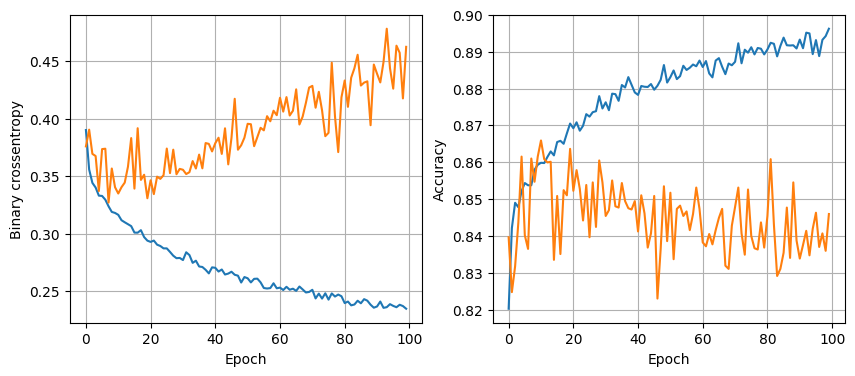

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.4615
32 nodes, drop 0, lr 0.01, batch size 64


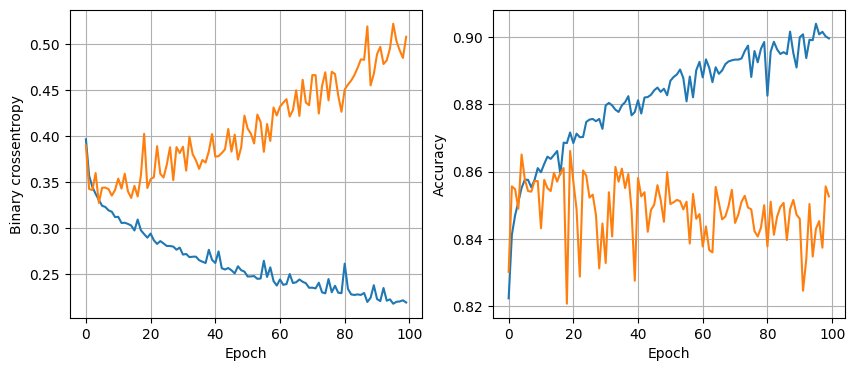

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.4954
32 nodes, drop 0, lr 0.01, batch size 128


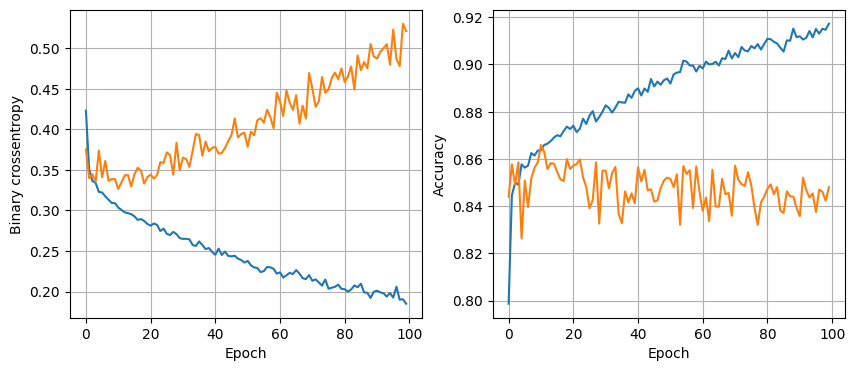

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.5177
32 nodes, drop 0, lr 0.003, batch size 32


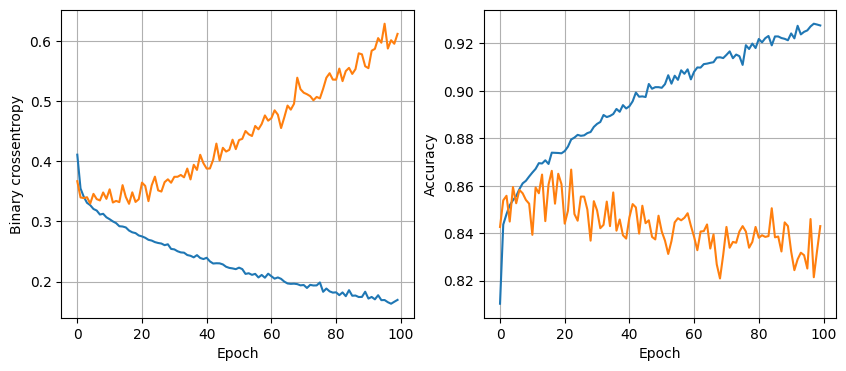

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8447 - loss: 0.5917
32 nodes, drop 0, lr 0.003, batch size 64


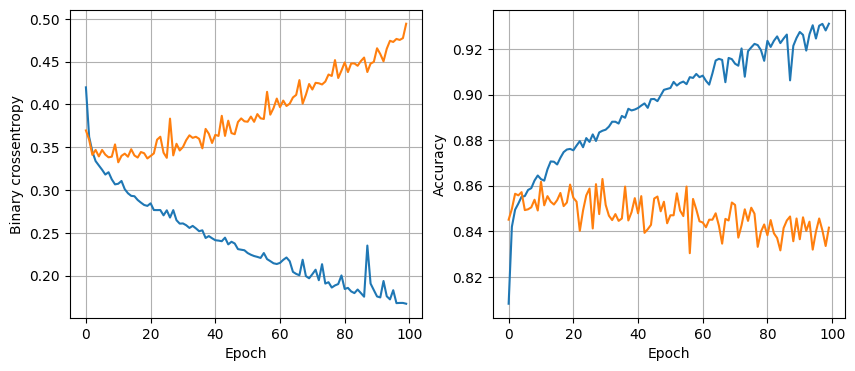

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8465 - loss: 0.4705
32 nodes, drop 0, lr 0.003, batch size 128


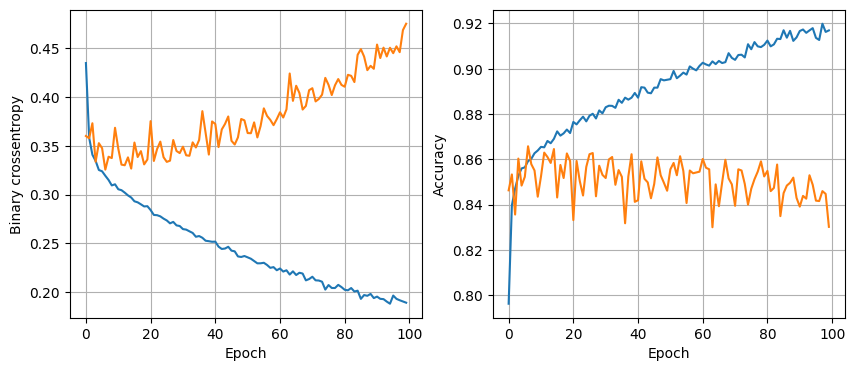

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.4696
32 nodes, drop 0, lr 0.001, batch size 32


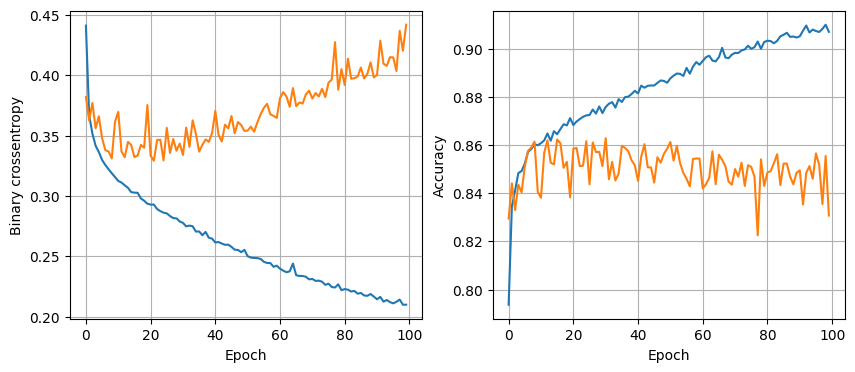

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4281
32 nodes, drop 0, lr 0.001, batch size 64


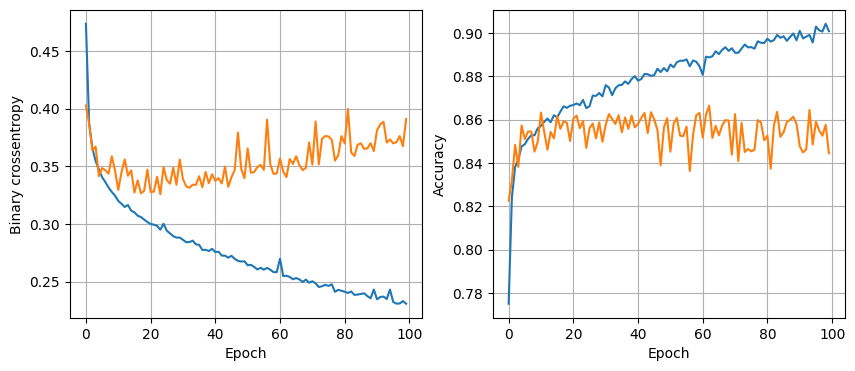

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8476 - loss: 0.3820
32 nodes, drop 0, lr 0.001, batch size 128


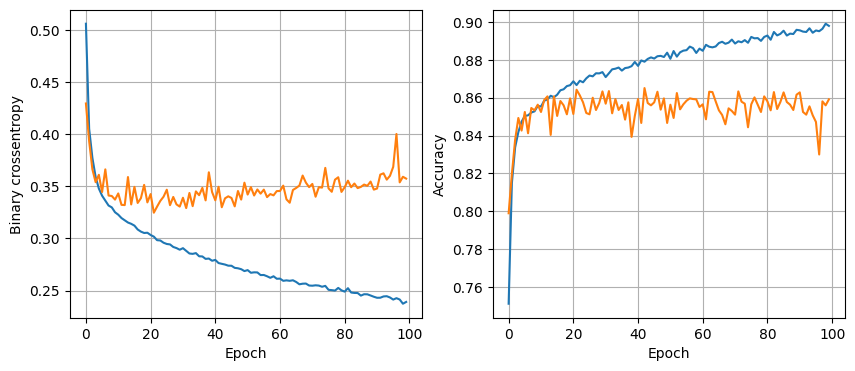

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3557
32 nodes, drop 0.2, lr 0.01, batch size 32


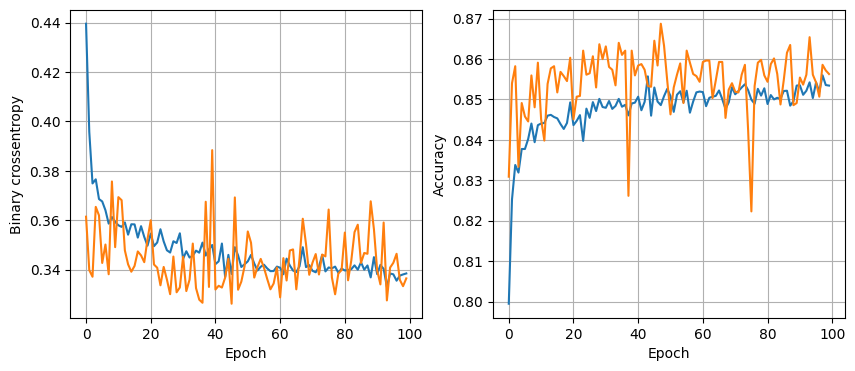

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3303
32 nodes, drop 0.2, lr 0.01, batch size 64


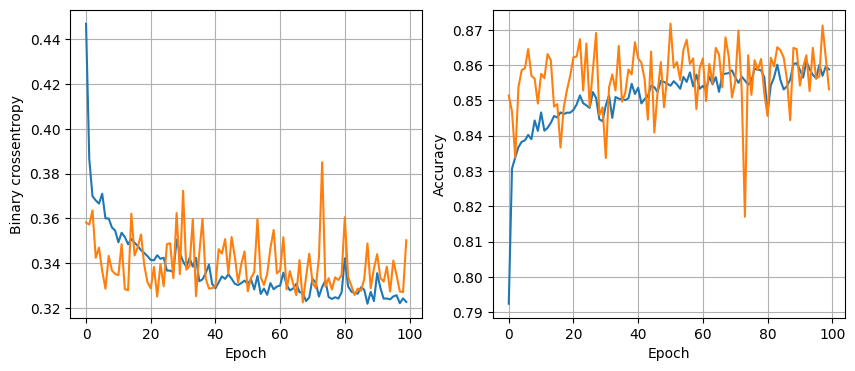

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3446
32 nodes, drop 0.2, lr 0.01, batch size 128


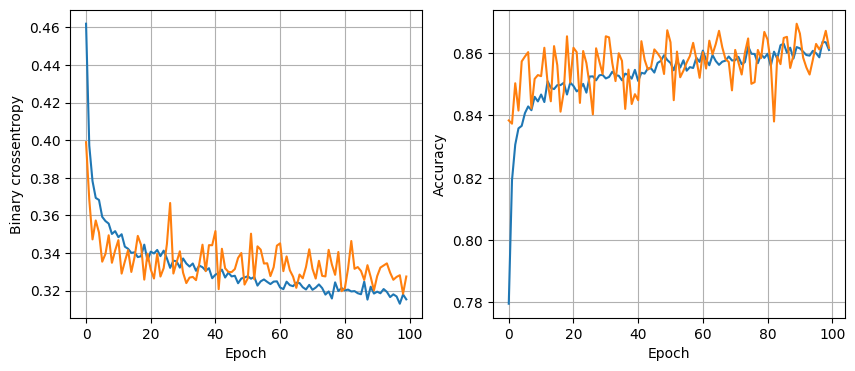

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.3227
32 nodes, drop 0.2, lr 0.003, batch size 32


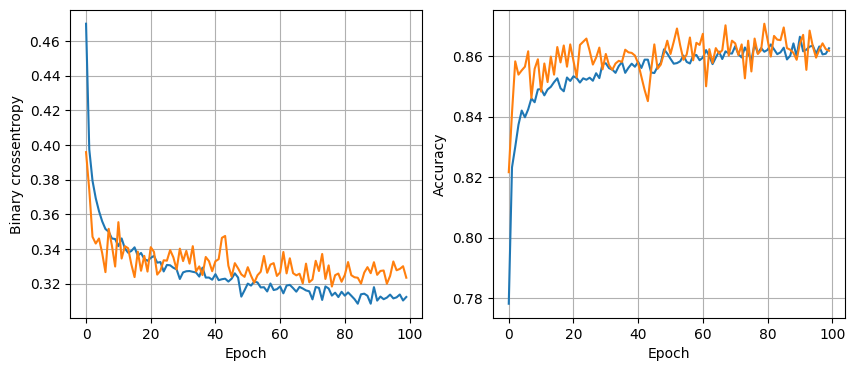

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3180
32 nodes, drop 0.2, lr 0.003, batch size 64


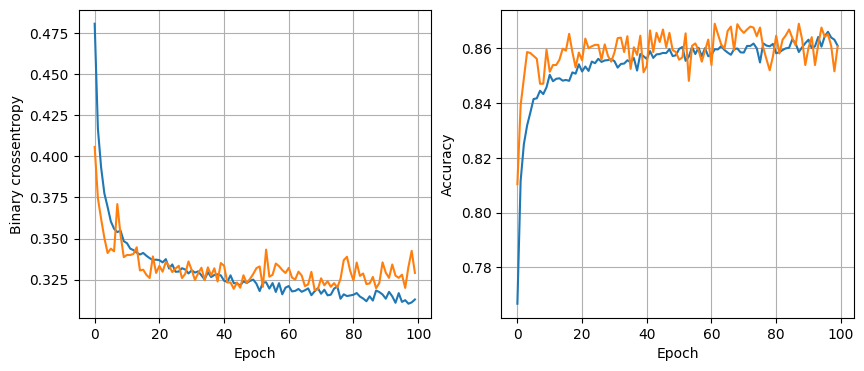

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.3246
32 nodes, drop 0.2, lr 0.003, batch size 128


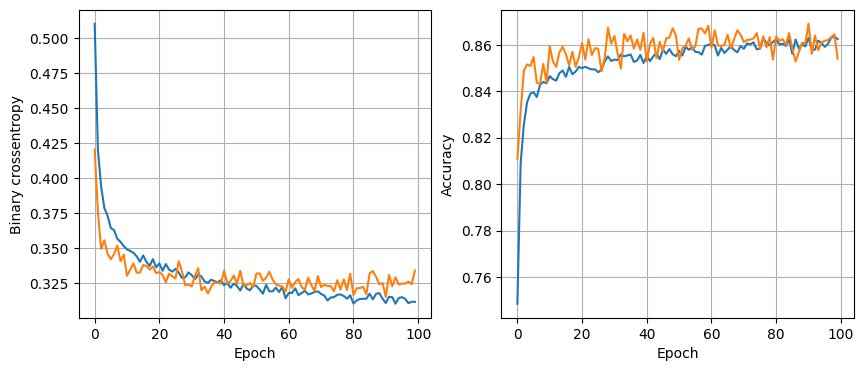

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3303
32 nodes, drop 0.2, lr 0.001, batch size 32


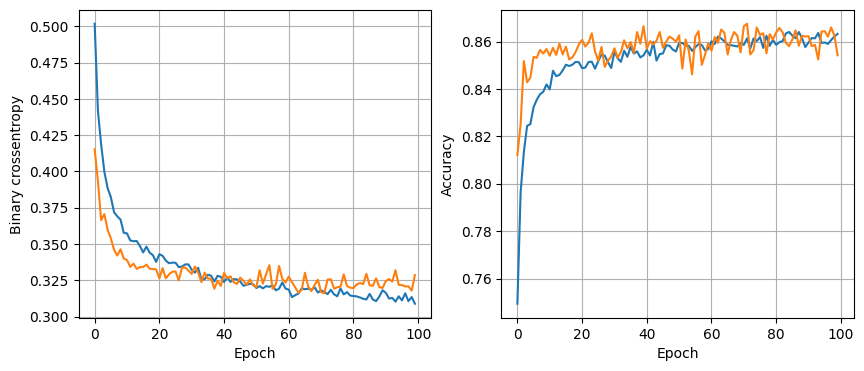

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3274
32 nodes, drop 0.2, lr 0.001, batch size 64


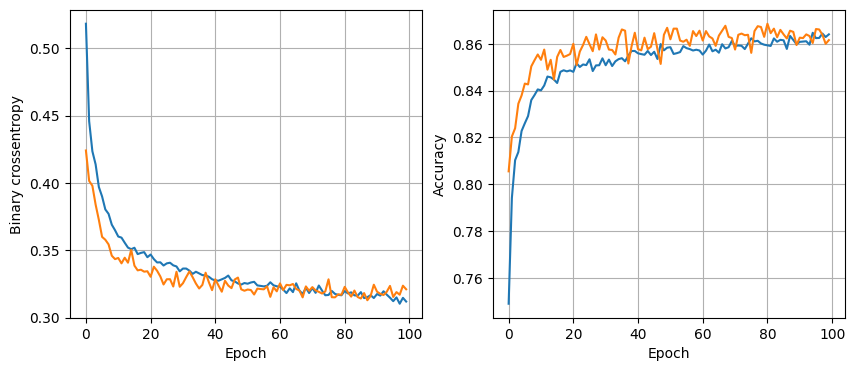

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3146
32 nodes, drop 0.2, lr 0.001, batch size 128


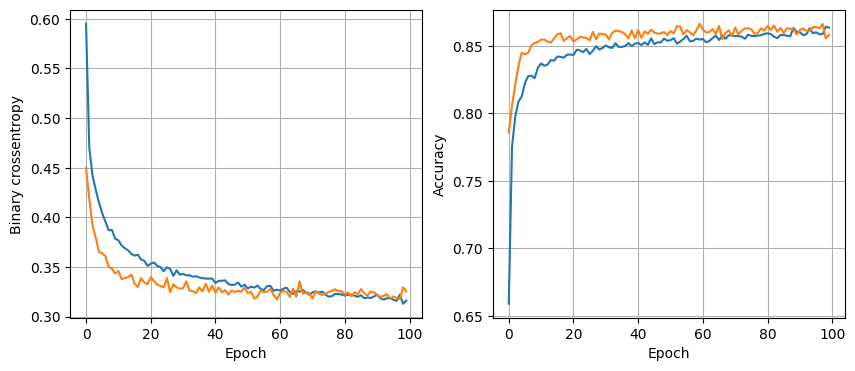

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.3236
64 nodes, drop 0, lr 0.01, batch size 32


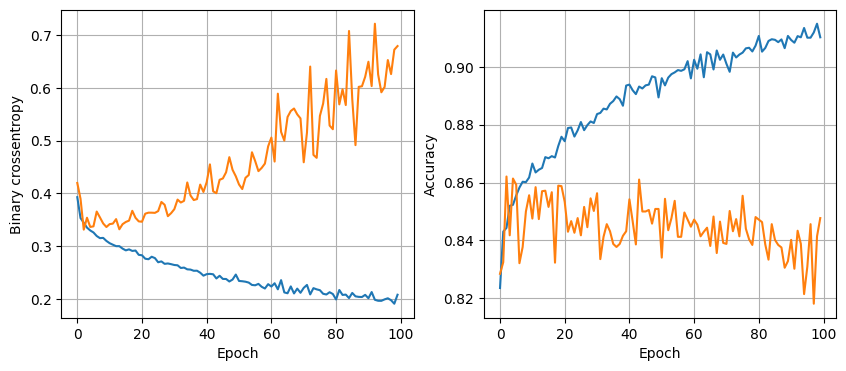

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.6553
64 nodes, drop 0, lr 0.01, batch size 64


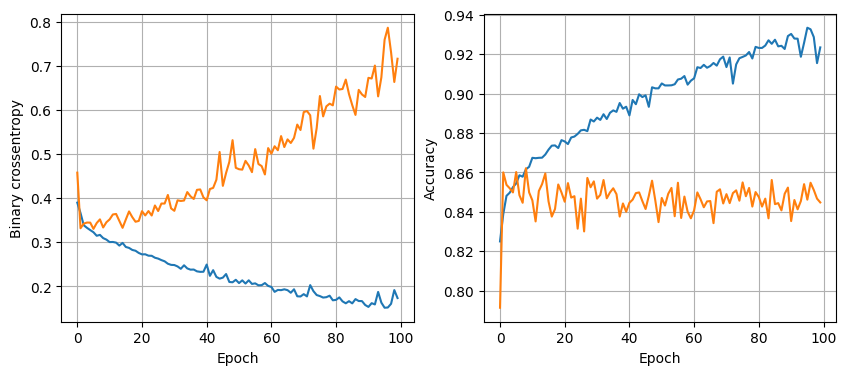

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.6860
64 nodes, drop 0, lr 0.01, batch size 128


I0000 00:00:1720621476.336960  261713 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_440', 8 bytes spill stores, 8 bytes spill loads



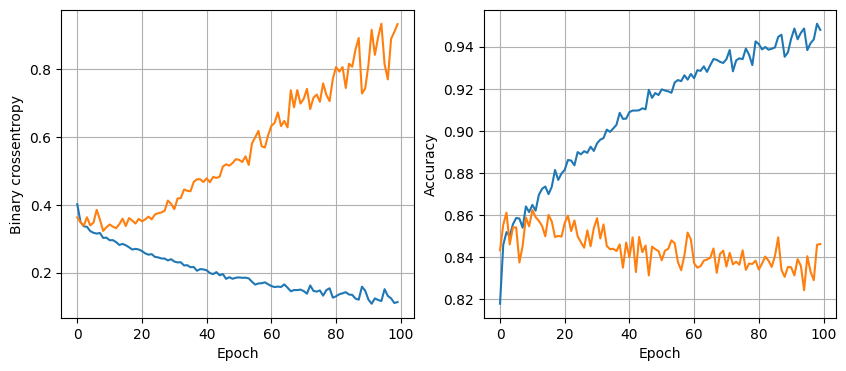

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.9045
64 nodes, drop 0, lr 0.003, batch size 32


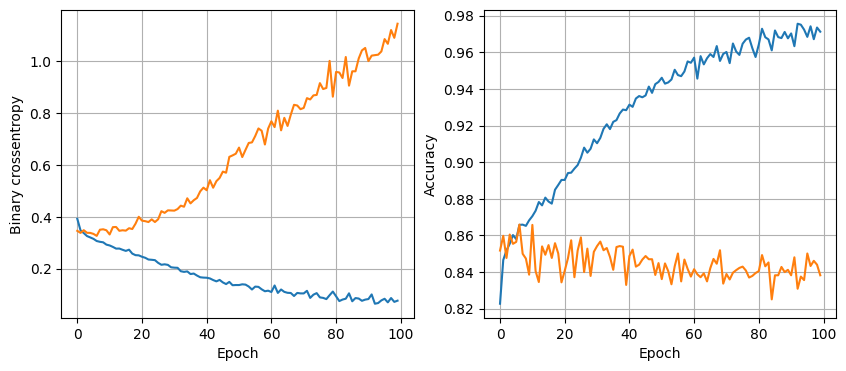

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8473 - loss: 1.0692
64 nodes, drop 0, lr 0.003, batch size 64


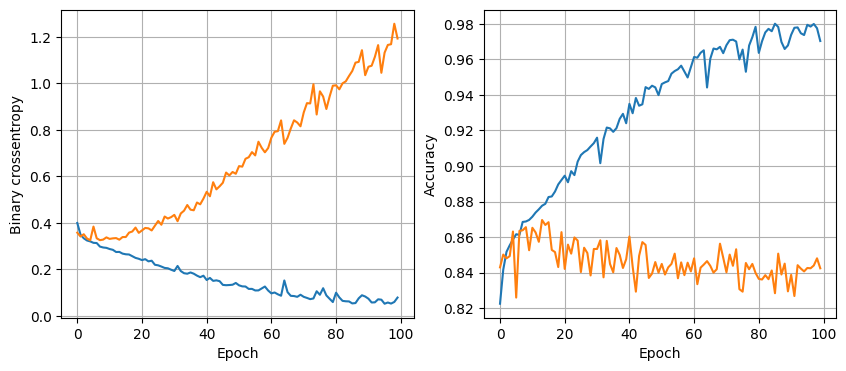

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 1.1490
64 nodes, drop 0, lr 0.003, batch size 128


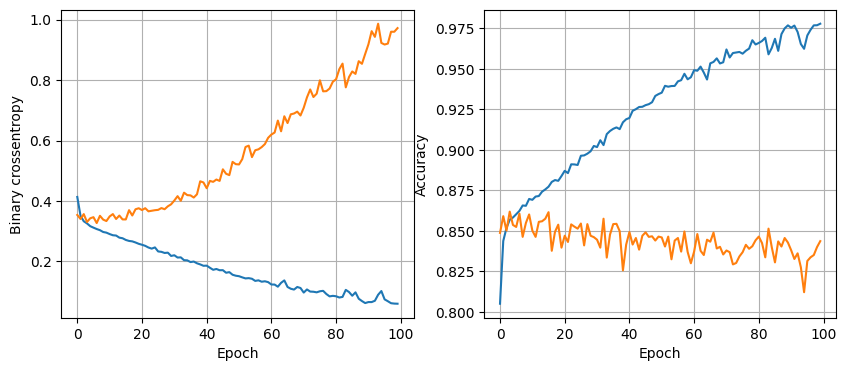

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.9272
64 nodes, drop 0, lr 0.001, batch size 32


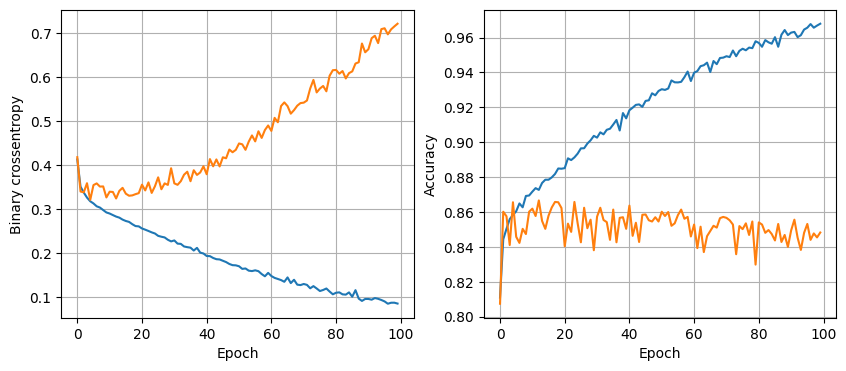

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.6989
64 nodes, drop 0, lr 0.001, batch size 64


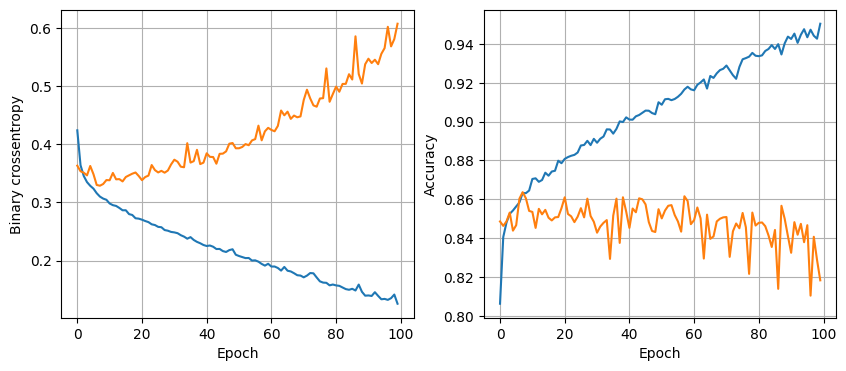

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.6039
64 nodes, drop 0, lr 0.001, batch size 128


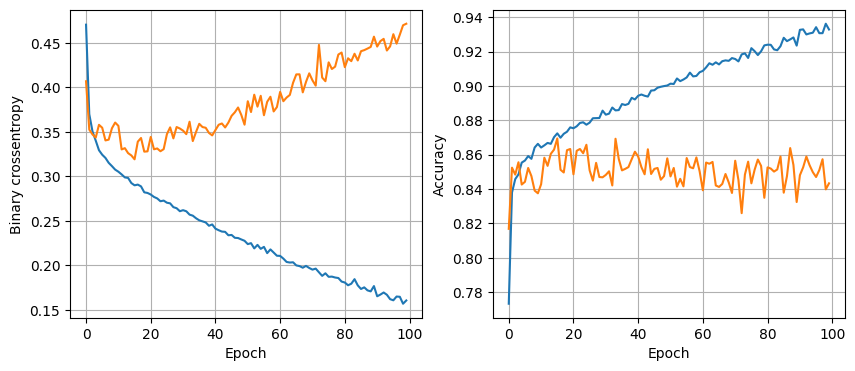

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.4558
64 nodes, drop 0.2, lr 0.01, batch size 32


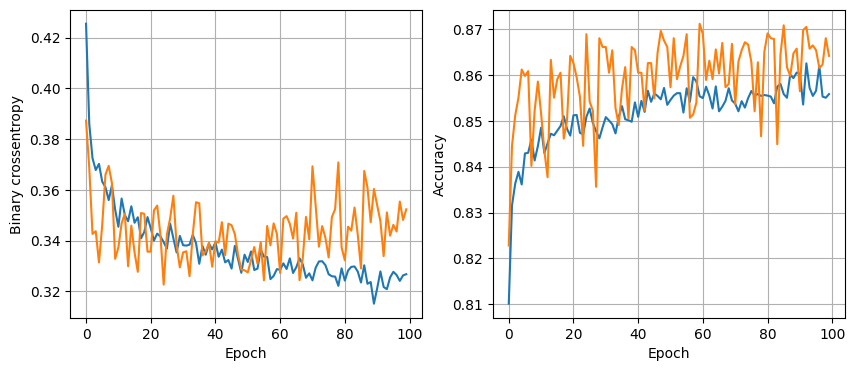

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3355
64 nodes, drop 0.2, lr 0.01, batch size 64


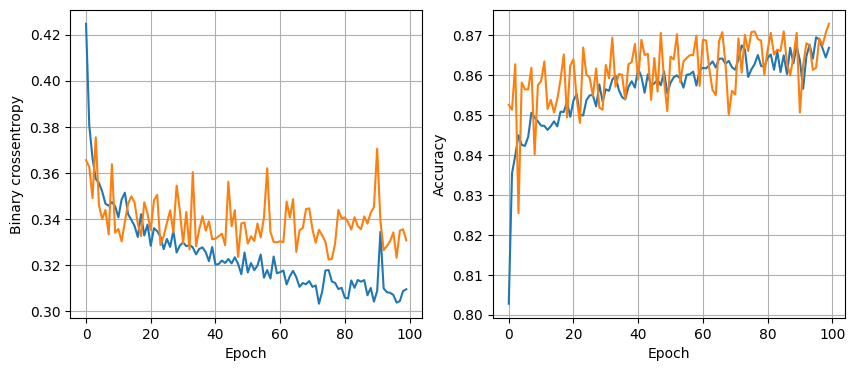

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3237
64 nodes, drop 0.2, lr 0.01, batch size 128


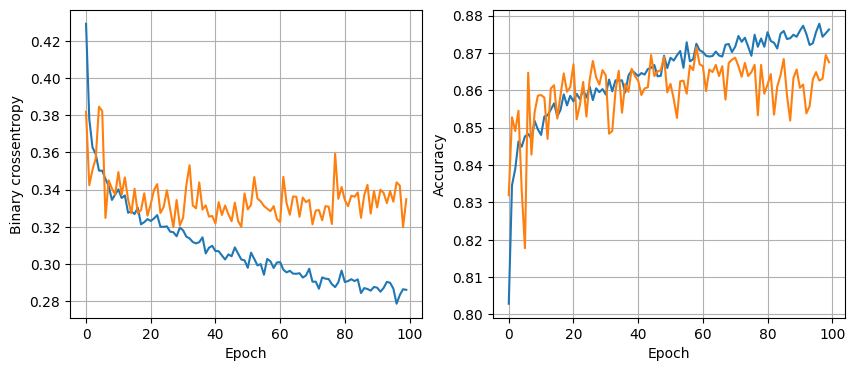

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.3316
64 nodes, drop 0.2, lr 0.003, batch size 32


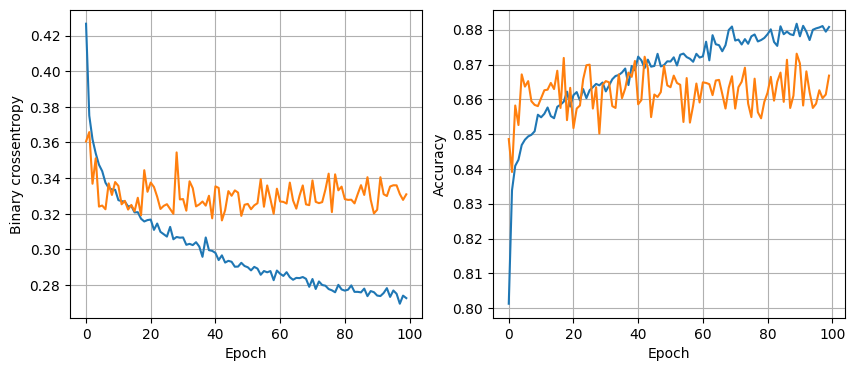

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3262
64 nodes, drop 0.2, lr 0.003, batch size 64


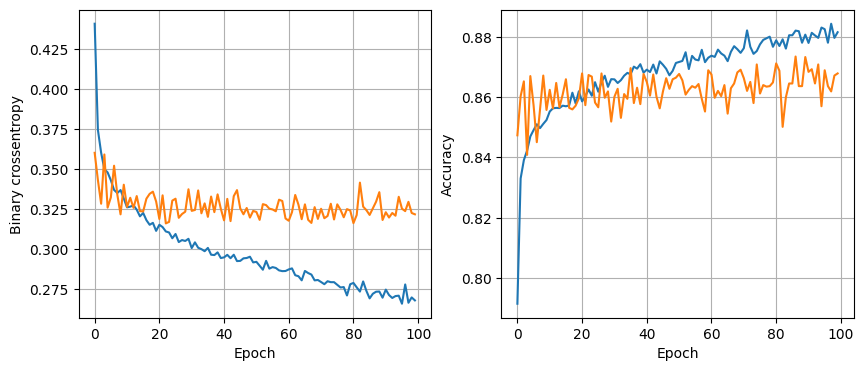

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3124
64 nodes, drop 0.2, lr 0.003, batch size 128


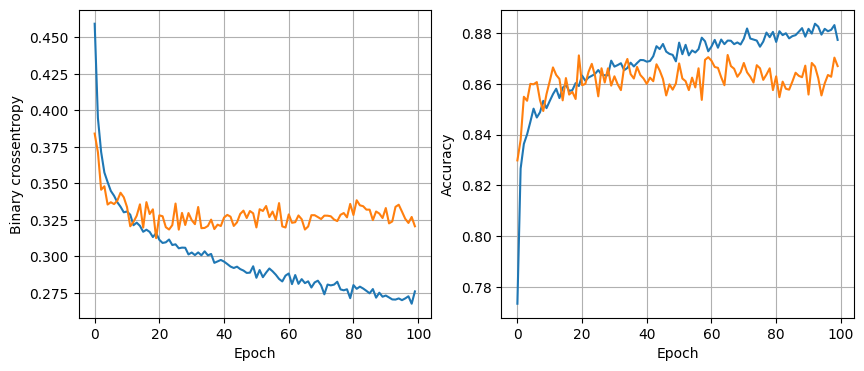

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.3141
64 nodes, drop 0.2, lr 0.001, batch size 32


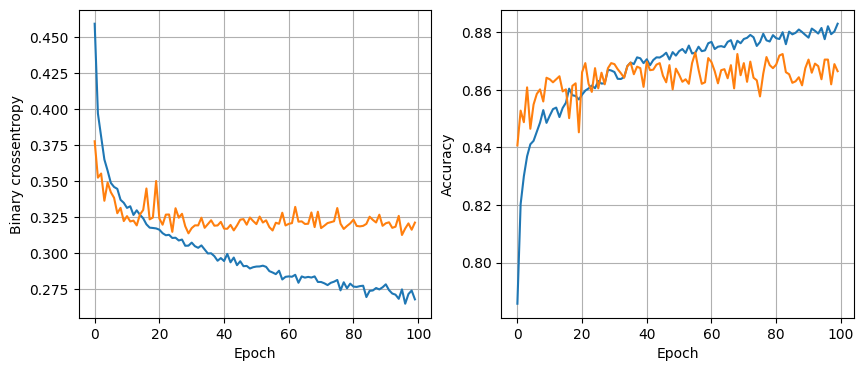

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3118
64 nodes, drop 0.2, lr 0.001, batch size 64


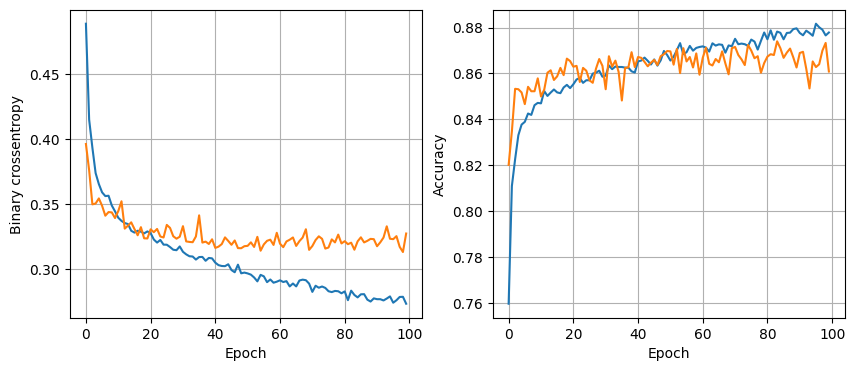

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3228
64 nodes, drop 0.2, lr 0.001, batch size 128


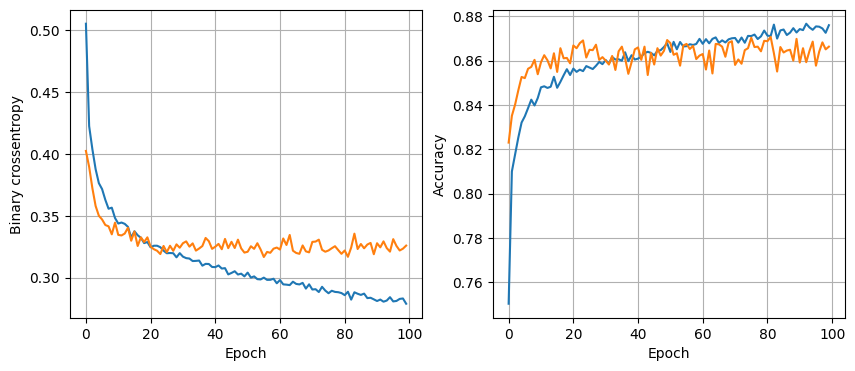

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3245


In [30]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for drop_prob in [0, 0.2]:
        for lr in [0.01, 0.003, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, drop {drop_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(
                    scaled_train_x, scaled_train_y, num_nodes, drop_prob, lr, batch_size, epochs
                )
                plot_result(history)
                val_loss = model.evaluate(scaled_valid_x, scaled_valid_y)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [37]:
y_pred = least_loss_model.predict(scaled_test_x)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0, 0, 1, ..., 1, 1, 0])

In [38]:
print(classification_report(scaled_test_y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       677
           1       0.89      0.91      0.90      1225

    accuracy                           0.87      1902
   macro avg       0.86      0.86      0.86      1902
weighted avg       0.87      0.87      0.87      1902

